In [15]:
import time
import random
import matplotlib.pyplot as plt
import numpy as np



#list of square n-dimentional matrices with increasing n up to 1000

#Implement the standart matrix multiplication algorithm 
#for A*B multiplication: colums of matrix A == rows matrix B
# A = n x m , B = m x l

#matrices are represented as nested lists zb. matrix = [
#   [1, 2, 3],
#   [4, 5, 6],
#   [7, 8, 9]
#] where matrix[index what list][index in list]

#matrix multiplication
#go through row from 1 to n 
#go through list 1 to n and take the same index from each list 
#same index multiplication plus next index from row


A = [
   [1, 2, 3],
  [4, 5, 6],
   [7, 8, 9]]

# Generates a random list of integers
def random_list(n):
    list = []
    for i in range(n):
        list.append(random.randint(1,10))
    return list

# Generates a random n x n matrix
def random_matrix(n):
    matrix = []
    for i in range(n):
        matrix.append(random_list(n))
    return matrix

B = random_matrix(15)
C = random_matrix(15)

# 1a) Implement the standard matrix multiplication algorithm 

def matrix_multyplier(A, B):
    n = len(A) #square matrices so nxn
    result_matrix = []
    for i in range(n):
        result_matrix.append([])
        for j in range(n): #every spot in matrix
            sum = 0
            for y in range(n):
                sum += A[i][y] * B[y][j] 
            result_matrix[i].append(sum)
    
    return result_matrix

print(matrix_multyplier(B, C))

[[30, 36, 42], [66, 81, 96], [102, 126, 150]]


In [12]:

A = [
   [1, 2, 3],
  [4, 5, 6],
   [7, 8, 9]]


# Generates a random list of integers
def random_list(n):
    list = []
    for i in range(n):
        list.append(random.randint(1,10))
    return list

# Generates a random n x n matrix
def random_matrix(n):
    matrix = []
    for i in range(n):
        matrix.append(random_list(n))
    return matrix

B = random_matrix(15)
C = random_matrix(15)

#1b) Analyze and benchmark the runtime of your algorithm on each matrix size.

def matrix_multyplier(A, B):
    passed_time = time.time()
    n = len(A) #square matrices so nxn
    result_matrix = []
    for i in range(n):
        result_matrix.append([])
        for j in range(n): #every spot in matrix
            sum = 0
            for y in range(n):
                sum += A[i][y] * B[y][j] 
            result_matrix[i].append(sum)
    passed_time = time.time() - passed_time
    return passed_time

print(matrix_multyplier(A,A))

3.0994415283203125e-06


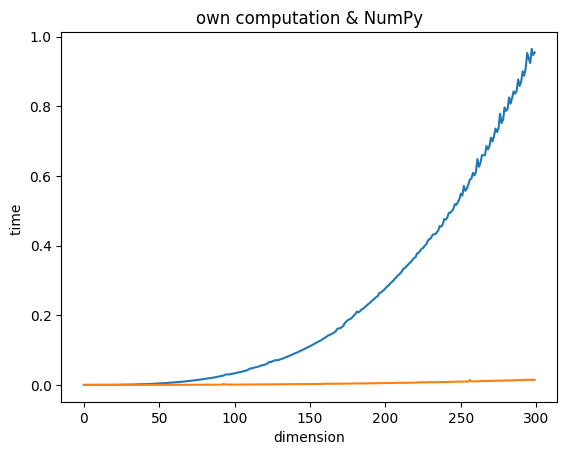

In [19]:

#1c) Compare your implementation with the built-in matrix multiplication in NumPy.
#Plot the time complexity for both methods as the matrix size increases.

# Generates a random list of integers
def random_list(n):
    list = []
    for i in range(n):
        list.append(random.randint(1,10))
    return list
        
# Generates a random n x n matrix
def random_matrix(n):
    matrix = []
    for i in range(n):
        matrix.append(random_list(n))
    return matrix



def matrix_multyplier(A, B):
    passed_time = time.time()
    n = len(A) #square matrices so nxn
    result_matrix = []
    for i in range(n):
        result_matrix.append([])
        for j in range(n): #every spot in matrix
            sum = 0
            for y in range(n):
                sum += A[i][y] * B[y][j] 
            result_matrix[i].append(sum)
    passed_time = time.time() - passed_time
    return result_matrix, passed_time

#plotting
def plot_time(n):
    x = []
    y = []
    npy = []
    for i in range(0,n):
        a = random_matrix(i)
        matrix, passed_time = matrix_multyplier(a,a)
        y.append(passed_time)
        x.append(i)
        time1 = time.time()
        matrix = np.matmul(a,a)
        time2 = time.time()
        npy.append(time2 - time1)
    plt.plot(x,y)
    plt.plot(x, npy)
    plt.title("own computation & NumPy")
    plt.xlabel("dimension")
    plt.ylabel("time ")
    plt.show()

plot_time(300)

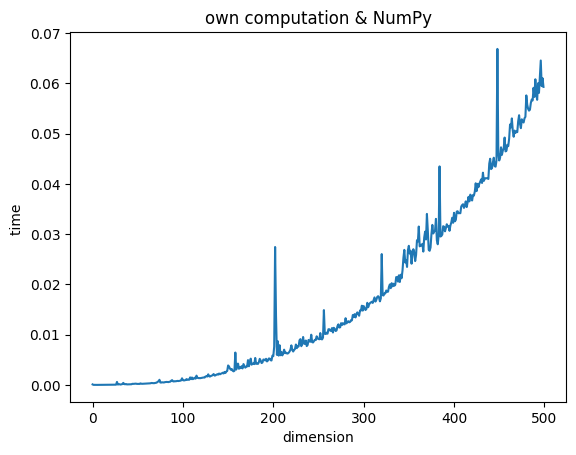

In [23]:
def plot_time_numpy(n):
    x = []
    npy = []
    for i in range(0,n):
        a = random_matrix(i)
        x.append(i)
        time1 = time.time()
        matrix = np.matmul(a,a)
        time2 = time.time()
        npy.append(time2 - time1)
    
    plt.plot(x, npy)
    plt.title("NumPy")
    plt.xlabel("dimension")
    plt.ylabel("time ")
    plt.show()

plot_time_numpy(500)

In [59]:
#1e) Implement a simple version of Strassen’s algorithm for two-dimensional matrices (with and without the recursion)

#2x2 matrix 
# uses 7 Products instead of 8 like in our algorythm

# Generates a random list of integers
def random_list(n):
    list = []
    for i in range(n):
        list.append(random.randint(1,10))
    return list
        
# Generates a random n x n matrix
def random_matrix(n):
    matrix = []
    for i in range(n):
        matrix.append(random_list(n))
    return matrix

B = random_matrix(2)
C = random_matrix(2)


def matrix_multyplier(A, B):
    passed_time = time.time()
    n = len(A) #square matrices so nxn
    result_matrix = []
    for i in range(n):
        result_matrix.append([])
        for j in range(n): #every spot in matrix
            sum = 0
            for y in range(n):
                sum += A[i][y] * B[y][j] 
            result_matrix[i].append(sum)
    passed_time = time.time() - passed_time
    return result_matrix, passed_time

#Strassen non recursive

def strassen_non_recursive(B, C):
    a = B[0][0]
    b = B[0][1]
    c = B[1][0]
    d = B[1][1]

    e = C[0][0]
    f = C[0][1]
    g = C[1][0]
    h = C[1][1]

    M1 = (a + d) * (e + h)
    M2 = (c + d) * e
    M3 = a * (f - h)
    M4 = d * (g - e)
    M5 = (a + b) * h
    M6 = (c - a) * (e + f)
    M7 = (b - d) * (g + h)

    A11 = M1 + M4 - M5 + M7
    A12 = M3 + M5
    A21 = M2 + M4
    A22 = M1 - M2 + M3 + M6

    A = [
        [A11, A12]
        [A21, A22]
    ]
    return A

def strassen_recursive(B,C):
    
    if len(B) == 1:
        return [[A[0][0] * B[0][0]]]
    
    a = B[0][0]
    b = B[0][1]
    c = B[1][0]
    d = B[1][1]

    e = C[0][0]
    f = C[0][1]
    g = C[1][0]
    h = C[1][1]

    
    t1 = strassen_recursive([[a]], [[f - h]])
    t2 = strassen_recursive([[a + b]], [[h]])
    t3 = strassen_recursive([[c + d]], [[e]])
    t4 = strassen_recursive([[d]], [[g - e]])
    t5 = strassen_recursive([[a + d]], [[e + h]])
    t6 = strassen_recursive([[b - d]], [[g + h]])
    t7 = strassen_recursive([[a - c]], [[e  + f]])

    
    A11 = [[t5[0][0] + t4[0][0] - t2[0][0] + t6[0][0]]]
    A12 = [[t1[0][0] + t2[0][0]]]
    A21 = [[t3[0][0] + t4[0][0]]]
    A22 = [[t1[0][0] + t5[0][0] - t3[0][0] - t7[0][0]]]

    
    matrix = [A11[0][0], A12[0][0]], [A21[0][0], A22[0][0]]
    return [matrix]




#compares performances and plots
def plot_time(n):
    x = [] #size of matrices
    y = []
    npy = []
    strasseny_non = []
    strasseny_recursive = []
    for i in range(2,n):
        
        a = random_matrix(i)
        matrix, passed_time = matrix_multyplier(a,a)
        y.append(passed_time)
        x.append(i)

        time_start = time.time()
        matrix = np.matmul(a,a)
        time_finish = time.time()
        npy.append(time_finish - time_start)

        time_start = time.time()
        matrixnon = strassen_non_recursive(a,a)
        time_finish = time.time()
        strasseny_non.append(time_finish - time_start)

        time_start = time.time()
        matrixrec = strassen_recursive(a,a)
        time_finish = time.time()
        strasseny_recursive.append(time_finish - time_start)



        #print(sum(passed_time))
        print(x, y, npy, strasseny_non, strasseny_recursive)

plot_time(2) # Adjust the range for comparison



<>:63: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
<>:63: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
/var/folders/sn/c9kfzmnn0bn5trb4lsr2ctzm0000gn/T/ipykernel_63506/250673960.py:63: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  [A11, A12]
